In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

In [3]:
from numpy.random import multivariate_normal,permutation

In [4]:
import pandas as pd

In [5]:
from pandas import DataFrame,Series

In [6]:
np.random.seed(19961123)

In [7]:
n0, mu0,variance0 = 20,[10,11],20

In [8]:
data0 = multivariate_normal(mu0 , np.eye(2)*variance0,n0)

In [9]:
df0 = DataFrame(data0,columns=['x1','x2'])

In [10]:
df0['t'] = 0

In [11]:
n1,mu1,variance1 = 15, [18,20],22

In [12]:
data1 = multivariate_normal(mu1 , np.eye(2)*variance1,n1)

In [13]:
df1 = DataFrame(data1,columns=['x1','x2'])

In [14]:
df1['t']=1

In [15]:
df = pd.concat([df0,df1],ignore_index=True)

In [16]:
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [17]:
train_set

,x1,x2,t
0,20.729880,18.209359,1
1,16.503919,14.685085,0
2,5.508661,17.426775,0
3,9.167047,9.178837,0
4,8.640423,9.561952,0
5,10.500988,17.002584,0
6,16.484766,22.232997,1
7,6.979059,8.180596,0
8,11.701339,0.996734,0
9,21.367990,18.712309,1


In [18]:
train_x = train_set[['x1','x2']].as_matrix()

In [19]:
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])

In [20]:
x = tf.placeholder(tf.float32,[None,2])

In [21]:
w = tf.Variable(tf.zeros([2,1]))

In [22]:
w0 = tf.Variable(tf.zeros([1]))

In [23]:
f = tf.matmul(x,w)+w0

In [24]:
p = tf.sigmoid(f)

In [25]:
t = tf.placeholder(tf.float32,[None,1])

In [26]:
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))

In [27]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [28]:
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))

In [29]:
accuacy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) 

In [30]:
sess = tf.Session()

In [31]:
sess.run(tf.global_variables_initializer())

In [32]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run(
            [loss,accuacy], feed_dict={x:train_x, t:train_t})
        print ('Step:%d, Loss:%f , Accuacy:%f' 
               % (i, loss_val, acc_val))

Step:2000, Loss:15.165894 , Accuacy:0.885714
Step:4000, Loss:10.772635 , Accuacy:0.914286
Step:6000, Loss:8.197757 , Accuacy:0.971429
Step:8000, Loss:6.576121 , Accuacy:0.971429
Step:10000, Loss:5.511984 , Accuacy:0.942857
Step:12000, Loss:4.798029 , Accuacy:0.942857
Step:14000, Loss:4.314191 , Accuacy:0.942857
Step:16000, Loss:3.986273 , Accuacy:0.942857
Step:18000, Loss:3.766507 , Accuacy:0.942857
Step:20000, Loss:3.623062 , Accuacy:0.942857


In [33]:
w0_val, w_val= sess.run([w0,w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print (w0_val, w1_val, w2_val)

-15.630414 0.560301 0.4925971


<IPython.core.display.Javascript object>


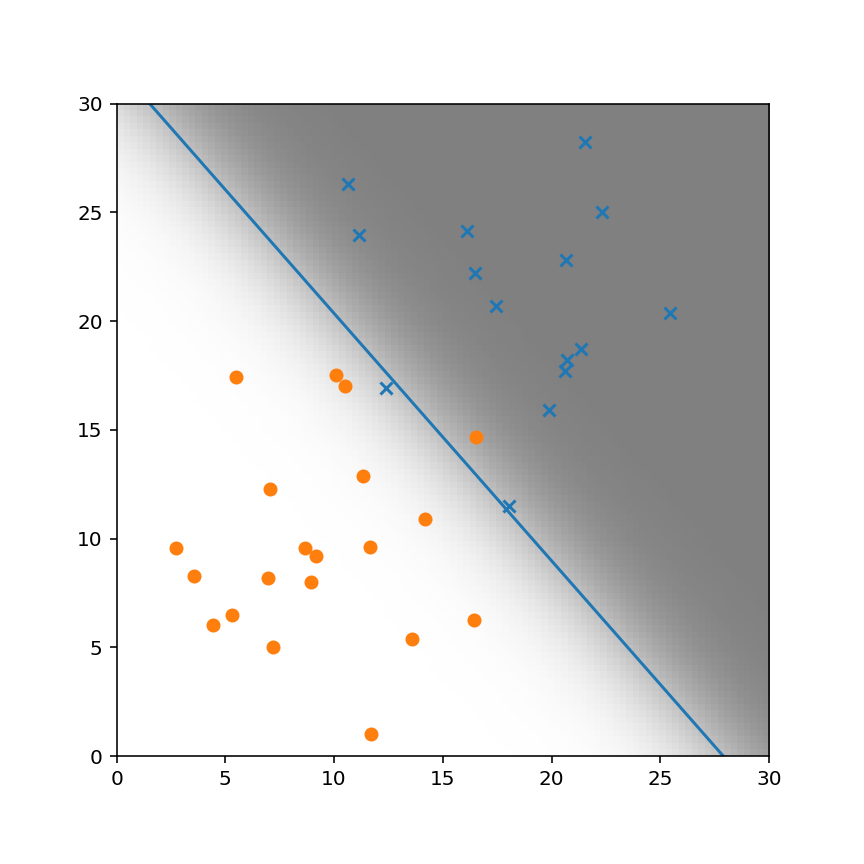

In [43]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0, 30, 10)
liney = - (w1_val*linex/w2_val+w0_val/w2_val)
subplot.plot(linex,liney)

field = [[(1/(1+np.exp(-(w0_val+w1_val*x1+w2_val*x2))))#スターとプラス注意
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin = 'lower', extent=(0,30,0,30), 
               cmap= plt.cm.gray_r, alpha=0.5)